<a href="https://colab.research.google.com/github/Yejide123/Nigeria-2023_Multi_Sentiment_analysis_Project/blob/main/Project_data_preparation_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount the platform on google drive

Mounted at /content/drive


## Defining the Functions for the Preprocessing Tasks

In [ ]:
# importing the required libraries
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
string.punctuation

#defining the function to remove punctuation from text and conversion of the text to text lower case
def rem_punctuation_change_case(text):

    convert_str = [str(i) for i in text]

    punctuationfree= [row.translate(str.maketrans('','',string.punctuation)) for row in convert_str]
    convert_lower = [row.lower() for row in punctuationfree]
    return convert_lower

#defining the function to remove http and \n within text
def convert_http_rem_newline_char(text):
    # Use regular expressions to find words starting with "http"
    converted_text = re.sub(r'\b(http\S*)', '', text) # remove URLs
    remove_newlines = re.sub(r'\n', '', converted_text)
    return remove_newlines

#defining the function to remove username from the text
def remove_username(text_list): #to remove username
    # Use list comprehension to remove the first word from each text
    cleaned_text_list = [' '.join(text.split()[1:]) for text in text_list]

    return cleaned_text_list


#defining the function to remove irrelevant patterns from the text
def remove_patterns_from_text(text_list, patterns):
    # Compile the patterns
    compiled_patterns = [re.compile(pattern) for pattern in patterns]

    # Use list comprehension to remove patterns from each text
    cleaned_text_list = []
    for text in text_list:
        for pattern in compiled_patterns:
            text = re.sub(pattern, '', text)
        cleaned_text_list.append(text)

    return cleaned_text_list

#defining the function to remove stopwords from the text
def remove_stopwords(text_list):
    stop_words = set(stopwords.words('english'))
    cleaned_text_list = [' '.join([word for word in text.split() if word.lower() not in stop_words]) for text in text_list]
    return cleaned_text_list


#defining the function to remove duplicates from the text
def remove_duplicates(text_list):

    # Use set to automatically remove duplicates
    unique_set = set(text_list)

    # Convert the set back to a list to maintain the order
    unique_list = list(unique_set)

    return unique_list
def replace_nan_with_empty_string_in_list(text_list):

    # Replace np.nan with an empty string using list comprehension
    cleaned_list = [text if not pd.isna(text) else '' for text in text_list]

    return cleaned_list

#perform lemmatization using nltk
def lemmatize_text(text_list):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text_list = [' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in nltk.pos_tag(word_tokenize(text))]) for text in text_list]
    return lemmatized_text_list

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    elif pos_tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN  # Default to noun if not recognized

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# **Preparing** the labelled data to be used for training data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # set the style sheet use for plot
import re
import nltk
sns.set()
path = "/content/drive/MyDrive/nigerian_presidential_election_2023_tweets.csv"

train_data = pd.read_csv(path) #  read in the data

<ipython-input-3-6e22a9c012e4>:11: DtypeWarning: Columns (0,5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(path)


In [ ]:
train_data

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1617619263392743424,Fabulous Faga,"Abakaliki, Nigeria",🌹A Social media influencer\n💃A scientist by pr...,2020-10-19 08:02:47+00:00,244,999,686,False,2023-01-23 20:24:20+00:00,#OBI and #wife storm kastina state today.\n\nS...,"['OBI', 'wife']",Twitter for Android,0.0,5.0,False
1,1617648566977302534,Patriotic Nigerian,"Lagos, Nigeria",inspiring and amazingly created. Marketing/ Br...,2021-03-30 22:04:11+00:00,688,2827,3488,False,2023-01-23 22:20:47+00:00,"If they can’t point to you one project , inves...","['peterobi', 'Atiku']",Twitter for iPhone,11.0,15.0,False
2,1617657018873171969,Promise,NaN,Health and Fitness enthusiast,2022-05-06 23:03:08+00:00,2,22,40,False,2023-01-23 22:54:22+00:00,@atiku God with his infinite mercy will never ...,NaN,Twitter for iPhone,0.0,0.0,False
3,1617584206317752321,KemKem,"Lagos, Nigeria",My Tweets & Views are Personal & do not\nrefle...,2015-01-01 07:40:09+00:00,24474,1931,129947,False,2023-01-23 18:05:02+00:00,Governor @RotimiAkeredolu takes Asiwaju Bola A...,NaN,Twitter for Android,14.0,40.0,False
4,1617619489184690178,Mo'6icky,NaN,"By nature, an optimist_📌",2019-05-09 16:31:33+00:00,22,198,540,False,2023-01-23 20:25:14+00:00,@atiku Salutation is not Love. #Obi is coming,['Obi'],Twitter for Android,0.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74559,1629802540056342528.0,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4870557.0,161,745,True,2023-02-26 11:16:20+00:00,I received with great sadness reports of the r...,NaN,Twitter for iPhone,1362.0,10320.0,False
74560,1629460175311519744.0,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4870557.0,161,745,True,2023-02-25 12:35:54+00:00,My deepest condolences to his family and the F...,NaN,Twitter for iPhone,101.0,835.0,False
74561,1629460171301740544.0,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4870557.0,161,745,True,2023-02-25 12:35:53+00:00,Hon Sunday Zaka truly embodied the Recovery sp...,NaN,Twitter for iPhone,619.0,5930.0,False
74562,1629409042543124480.0,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4870557.0,161,745,True,2023-02-25 09:12:43+00:00,I just exercised my right to vote. Let’s all d...,NaN,Twitter for iPhone,2277.0,18793.0,False


In [ ]:
train_data.shape # check the rows and columns info

(74564, 16)

In [ ]:
train_data.duplicated('text').value_counts() # check for duplicates

False    74044
True       520
dtype: int64

In [ ]:
train_data['text'].isnull().sum()  #Count the NaN

11

In [ ]:
date = train_data['date'].str.slice(0, 10) # check the date range
date

0        2023-01-23
1        2023-01-23
2        2023-01-23
3        2023-01-23
4        2023-01-23
            ...    
74559    2023-02-26
74560    2023-02-25
74561    2023-02-25
74562    2023-02-25
74563    2023-02-23
Name: date, Length: 74564, dtype: object

## Cleaning the trained **data**

In [ ]:
text = train_data['text'] # get the the column text

text = text.tolist() # convert the text to list

# calling the defined Preprocessing functions on the list of text
preprocess_text = rem_punctuation_change_case(text)
cleaned_text =[]
for text in preprocess_text:
   preprocess_text = convert_http_rem_newline_char(text)
   cleaned_text.append(preprocess_text)

#main_cleaned_text = remove_duplicates(main_cleaned_text)
cleaned_text = replace_nan_with_empty_string_in_list(cleaned_text)
cleaned_text = remove_username(cleaned_text)
cleaned_text = remove_stopwords(cleaned_text)
cleaned_text = lemmatize_text(cleaned_text)

In [ ]:

train_data['cleaned_text'] = cleaned_text # Add the clean text to the datase



train_data= train_data[['text', 'cleaned_text']]
train_data

,text,cleaned_text
0,#OBI and #wife storm kastina state today.\n\nS...,wife storm kastina state todaysee crowd nigeri...
1,"If they can’t point to you one project , inves...",can ’ t point one project investment vision le...
2,@atiku God with his infinite mercy will never ...,god infinite mercy never allow emerge presiden...
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,rotimiakeredolu take asiwaju bola ahmed tinubu...
4,@atiku Salutation is not Love. #Obi is coming,salutation love obi come
...,...,...
74559,I received with great sadness reports of the r...,receive great sadness report raze popular maid...
74560,My deepest condolences to his family and the F...,deep condolence family fct pdp family may soul...
74561,Hon Sunday Zaka truly embodied the Recovery sp...,sunday zaka truly embody recovery spirit pdp e...
74562,I just exercised my right to vote. Let’s all d...,exercise right vote let ’ s part participate s...


In [ ]:
# Remove duplicates based on cleaned text
train_data_unique= train_data.drop_duplicates(subset='cleaned_text',  inplace=False)

In [ ]:
train_data_unique

,text,cleaned_text
0,#OBI and #wife storm kastina state today.\n\nS...,wife storm kastina state todaysee crowd nigeri...
1,"If they can’t point to you one project , inves...",can ’ t point one project investment vision le...
2,@atiku God with his infinite mercy will never ...,god infinite mercy never allow emerge presiden...
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,rotimiakeredolu take asiwaju bola ahmed tinubu...
4,@atiku Salutation is not Love. #Obi is coming,salutation love obi come
...,...,...
74558,"I wish to convey my sympathies to the victims,...",wish convey sympathy victim gov zulum shehu bo...
74559,I received with great sadness reports of the r...,receive great sadness report raze popular maid...
74560,My deepest condolences to his family and the F...,deep condolence family fct pdp family may soul...
74561,Hon Sunday Zaka truly embodied the Recovery sp...,sunday zaka truly embody recovery spirit pdp e...


In [ ]:
train_data_unique.to_csv('/content/drive/MyDrive/Project_codes/train_cleaned_dataset.csv') # save the cleaned data to Project file

In [ ]:
train_data_unique.duplicated('cleaned_text').value_counts() # check for duplicates.csv

False    62142
dtype: int64

In [ ]:
train_data_unique['cleaned_text'].isnull().sum() #  check for null rows

0

In [ ]:
train_data_unique.shape

(62142, 2)

# **APPLING VADERS TO GET LABELLED DATA TO BE USED FOR TRAINING IN MACHINE LEARNING MODELS**

In [ ]:

from nltk.sentiment import SentimentIntensityAnalyzer
#generate the list of cleaned_text from the trained dataset
cleaned_text_list = train_data_unique['cleaned_text']
cleaned_text_list= cleaned_text_list.tolist()

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

res_list =[]
text_polarity_list = []
id_list = []
#myid = data['id'].tolist()

for text in cleaned_text_list:
  polarity = sia.polarity_scores(text)
  text_polarity_list.append(polarity)
text_polarity_list

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


[{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249},
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.25},
 {'neg': 0.491, 'neu': 0.265, 'pos': 0.244, 'compound': -0.6874},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369},
 {'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'compound': -0.2732},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.7579},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.5423},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.7351},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

In [ ]:
#  Extra out the compounds scores
compound_scores = []
for row in text_polarity_list:
  compound_score = row['compound']

  compound_scores.append(compound_score)


positive = 0
negative = 0
neutral = 0
for score in compound_scores:
  if score >= 0.05:
    positive = positive + 1
  elif score <= -0.05:
    negative = negative + 1
  elif score > -0.05 and score < 0.05:
    neutral = neutral + 1
print("Vaders_Positive_Count : ", positive, "Vaders_Negative_count : ", negative, "Neutral count: ", neutral)

Vaders_Positive_Count :  26723 Vaders_Negative_count :  12119 Neutral count:  23300


In [ ]:
compound_scores = []
for row in text_polarity_list:
  compound_score = row['compound']

  compound_scores.append(compound_score)

polarity_list = []
# apply rules to the compound scores to get the sentiments output
for score in compound_scores:
  if score >= 0.05:
    polarity = 'positive'
    polarity_list.append(polarity)
  elif score <= -0.05:
    polarity = 'negative'
    polarity_list.append(polarity)
  elif score > -0.05 and score < 0.05:
    polarity =  'neutral'
    polarity_list.append(polarity)
#print("Vaders_Positive_Count : ", positive, "Vaders_Negative_count : ", negative, "Neutral count: ", neutral)

polarity_list

['positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'p

In [ ]:
train_data_unique['scores'] = compound_scores
train_data_unique['label'] = polarity_list

<ipython-input-45-181773574281>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique['scores'] = compound_scores
<ipython-input-45-181773574281>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique['label'] = polarity_list


In [ ]:
train_data_unique  # The labelled data

,text,cleaned_text,scores,label
0,#OBI and #wife storm kastina state today.\n\nS...,wife storm kastina state todaysee crowd nigeri...,0.6249,positive
1,"If they can’t point to you one project , inves...",can ’ t point one project investment vision le...,0.2500,positive
2,@atiku God with his infinite mercy will never ...,god infinite mercy never allow emerge presiden...,-0.6874,negative
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,rotimiakeredolu take asiwaju bola ahmed tinubu...,0.0000,neutral
4,@atiku Salutation is not Love. #Obi is coming,salutation love obi come,0.6369,positive
...,...,...,...,...
74558,"I wish to convey my sympathies to the victims,...",wish convey sympathy victim gov zulum shehu bo...,0.4767,positive
74559,I received with great sadness reports of the r...,receive great sadness report raze popular maid...,0.3818,positive
74560,My deepest condolences to his family and the F...,deep condolence family fct pdp family may soul...,0.5423,positive
74561,Hon Sunday Zaka truly embodied the Recovery sp...,sunday zaka truly embody recovery spirit pdp e...,0.5574,positive


In [ ]:
train_data_unique.shape

(62142, 2)

In [ ]:
train_data_unique.to_csv('/content/drive/MyDrive/Project_codes/train_labelled_data.csv') # save the labelled data to the Project folders

Word Cloud to Identify the patterns to help in cleaning and splitting of the dataset into 3 datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


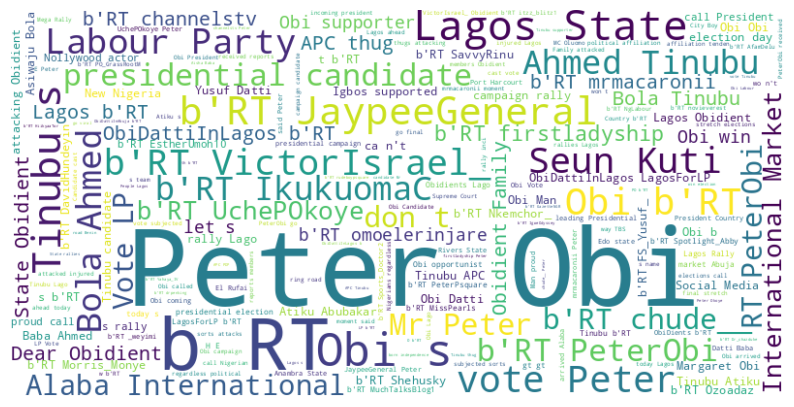

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('punkt')

# Download NLTK stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    text = ' '.join([word for word in tokens if word.lower() not in stop_words])

    # Remove specific word patterns (modify as needed)
    patterns_to_remove = ['x..']
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)

    return text

# Read your dataset into a DataFrame
# Assuming the dataset has a column named 'text' containing the text data
df = pd.read_csv('/content/drive/MyDrive/Nigeria_pres_elect_2023.csv')

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['Tweet_Text'].apply(preprocess_text)

# Combine all cleaned text data into a single string
text_data = ' '.join(df['cleaned_text'].astype(str))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Display the WordCloud
plt.show()


# **Project data Exploration and Preprocessing**

In [ ]:
import pandas as pd

main_data_path = "/content/drive/MyDrive/Nigeria_pres_elect_2023.csv"

main_data = pd.read_csv(main_data_path) # get the project data
main_data

,Tweet_ID,Tweet_Text,created_At,Lang,Conversation_Id
0,1624570197917966337,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",2023-02-12 00:44:52+00:00,en,1624570197917966337
1,1624570195158396929,b'@Hellraizorr @JDeanSCS @tedcruz @yaf Yep whe...,2023-02-12 00:44:52+00:00,en,1624243913061175297
2,1624570192704438273,b'RT @novieverest: I have said it if APC had s...,2023-02-12 00:44:51+00:00,en,1624570192704438273
3,1624570190707957760,b'RT @Mario9jaa: FUN FACT: He is now supportin...,2023-02-12 00:44:51+00:00,en,1624570190707957760
4,1624570189076471809,b'RT @MimiUhiene: the most dangerous kidnappe...,2023-02-12 00:44:50+00:00,en,1624570189076471809
...,...,...,...,...,...
2000238,1622977922515587073,b'RT @Dolapbespoke: Get our CUSTOMIZED bracele...,2023-02-07 15:17:44+00:00,en,1622977922515587073
2000239,1622977921076932609,b'RT @Oloruntooba: All because he\xe2\x80\x99s...,2023-02-07 15:17:44+00:00,en,1622977921076932609
2000240,1622977920821075969,b'RT @ManLikeIcey: I don\xe2\x80\x99t know if ...,2023-02-07 15:17:44+00:00,en,1622977920821075969
2000241,1622977919248203776,"b'RT @JaypeeGeneral: Dear Obidients, keep prea...",2023-02-07 15:17:44+00:00,en,1622977919248203776


In [ ]:
main_data.shape # check the rows and cloumns info

(2000243, 5)

In [ ]:
date = main_data['created_At'].str.slice(0, 10) # check the date range
date

0          2023-02-12
1          2023-02-12
2          2023-02-12
3          2023-02-12
4          2023-02-12
              ...    
2000238    2023-02-07
2000239    2023-02-07
2000240    2023-02-07
2000241    2023-02-07
2000242    2023-02-07
Name: created_At, Length: 2000243, dtype: object

In [ ]:
main_data.duplicated('Tweet_Text').value_counts() # check for duplicates


True     1683831
False     316412
dtype: int64

In [ ]:
main_data['Tweet_Text'].isnull().sum() #Count the NaN

0

In [ ]:
# Remove duplicates from the tweeted text
main_data= main_data.drop_duplicates(subset='Tweet_Text',  inplace=False)

# Data Preprocessing (Data Cleaning)





In [ ]:
# Reference the defined Preprocessing functions, and apply to clean the project data
main_text = main_data['Tweet_Text'] # get the LIST OF THE tweets from the pROJECT DATA

main_text = main_text.tolist()

preprocess_main_text = rem_punctuation_change_case(main_text)
main_cleaned_text =[]
for text in preprocess_main_text:
   preprocess_text = convert_http_rem_newline_char(text)
   main_cleaned_text.append(preprocess_text)
main_cleaned_text = remove_patterns_from_text(main_cleaned_text, ['x..','brt'])

main_cleaned_text = replace_nan_with_empty_string_in_list(main_cleaned_text)
main_cleaned_text = remove_username(main_cleaned_text)
main_cleaned_text = remove_stopwords(main_cleaned_text)
main_cleaned_text = lemmatize_text(main_cleaned_text)

In [ ]:
main_data['cleaned_text'] = main_cleaned_text # add the list of the processed text to the Project data
main_data


<ipython-input-40-eb0ede07a1a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['cleaned_text'] = main_cleaned_text


,Tweet_ID,Tweet_Text,created_At,Lang,Conversation_Id,cleaned_text
0,1624570197917966337,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",2023-02-12 00:44:52+00:00,en,1624570197917966337,elder statesman tanko yakassai drop bomb tinub...
1,1624570195158396929,b'@Hellraizorr @JDeanSCS @tedcruz @yaf Yep whe...,2023-02-12 00:44:52+00:00,en,1624243913061175297,jdeanscs tedcruz yaf yep hell moderate unifier...
2,1624570192704438273,b'RT @novieverest: I have said it if APC had s...,2023-02-12 00:44:51+00:00,en,1624570192704438273,say apc single dirt peter obi would easily use...
3,1624570190707957760,b'RT @Mario9jaa: FUN FACT: He is now supportin...,2023-02-12 00:44:51+00:00,en,1624570190707957760,fun fact support obi
4,1624570189076471809,b'RT @MimiUhiene: the most dangerous kidnappe...,2023-02-12 00:44:50+00:00,en,1624570189076471809,dangerous kidnapper anambra peter obi governor...
...,...,...,...,...,...,...
2000217,1622977950483095552,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",2023-02-07 15:17:51+00:00,en,1622977950483095552,peter obi vs asiwaju rally kwara venue e didnt...
2000227,1622977935123644418,"b'Vote Peter obi of #LP for a new Nigeria, dem...",2023-02-07 15:17:47+00:00,en,1622977935123644418,peter obi lp new nigeria democracy politics pe...
2000232,1622977931222953984,b'@AdaAnambra2023 The words on the streets now...,2023-02-07 15:17:46+00:00,en,1622920206119993345,word street fuel nd naira note scarcity plot s...
2000235,1622977929570357251,"b'RT @mrcow_enang: Las las, we will get sense ...",2023-02-07 15:17:46+00:00,en,1622977929570357251,la las get sense force day presidential electi...


In [ ]:
# Retain only required columns
columns_to_drop = ['Tweet_ID',	'created_At',	'Lang',	'Conversation_Id'	]
main_data = main_data.drop(columns=columns_to_drop)
main_data

,Tweet_Text,cleaned_text
0,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",elder statesman tanko yakassai drop bomb tinub...
1,b'@Hellraizorr @JDeanSCS @tedcruz @yaf Yep whe...,jdeanscs tedcruz yaf yep hell moderate unifier...
2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...
3,b'RT @Mario9jaa: FUN FACT: He is now supportin...,fun fact support obi
4,b'RT @MimiUhiene: the most dangerous kidnappe...,dangerous kidnapper anambra peter obi governor...
...,...,...
2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...
2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...
2000232,b'@AdaAnambra2023 The words on the streets now...,word street fuel nd naira note scarcity plot s...
2000235,"b'RT @mrcow_enang: Las las, we will get sense ...",la las get sense force day presidential electi...


In [ ]:
main_data.duplicated('Tweet_Text').value_counts() # check for duplicates after removing the duplicate from the tweet

False    316412
dtype: int64

In [ ]:
main_data.to_csv('/content/drive/MyDrive/Project_codes/main_cleaned_dataset.csv')

In [ ]:
main_data.shape

(316412, 2)

GETTING TINUBU'S DATA FROM THE MAIN DATA

In [ ]:
# List of patterns you're looking for
patterns = ['tinubu', 'buhari', 'apc', 'osibanjo', 'asiwaju', 'bolatinubu', 'lagos', 'yoruba', 'igbo', 'hausa','endsar', 'officialabat','2023','nigeria']

# Create a regular expression pattern using the list and the | (OR) operator
pattern = '|'.join(patterns)

# Convert the 'Text' column to lowercase
#main_data_unique['cleaned_text'] = main_data_unique['cleaned_text'].str.lower()

# Replace NaN values with an empty string in the 'Text' column
main_data['cleaned_text'].fillna('', inplace=True)

# Filter rows based on the pattern in the 'Text' column
Tinubu_filtered_rows = main_data[main_data['cleaned_text'].str.contains(pattern, case=False, na=False)]


Tinubu_filtered_rows.shape

(176628, 2)

In [ ]:
Tinubu_filtered_rows

,Tweet_Text,cleaned_text
0,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",elder statesman tanko yakassai drop bomb tinub...
2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...
6,"b""RT @DavidHundeyin: On election day, come out...",election day come large group tinubus hooligan...
7,b'RT @KadunaResident: Peter Obi has taught Agb...,peter obi teach agbado tinubu show street cred...
8,b'RT @PeterObi: Our most profound and heartfel...,profound heartfelt appreciation go people lago...
...,...,...
2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...
2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...
2000232,b'@AdaAnambra2023 The words on the streets now...,word street fuel nd naira note scarcity plot s...
2000235,"b'RT @mrcow_enang: Las las, we will get sense ...",la las get sense force day presidential electi...


In [ ]:
#Tinubu_dataset = Tinubu_filtered_rows[['Tweet_Text','cleaned_text']]
Tinubu_filtered_rows.to_csv('/content/drive/MyDrive/Project_codes/Tinubu_cleaned_dataset.csv')

GETTING OBI'S DATA FROM THE MAIN PROJECT DATA

In [ ]:
# List of patterns you're looking for
Obi_patterns = ['obi' ,  'lp', 'labour party','lagos', 'yoruba', 'igbo']

# Create a regular expression pattern using the list and the | (OR) operator
pattern = '|'.join(patterns)

# Create a regular expression pattern using the list and the | (OR) operator
pattern = '|'.join(patterns)

# Convert the 'Text' column to lowercase
#main_data_unique['cleaned_text'] = main_data_unique['cleaned_text'].str.lower()

# Replace NaN values with an empty string in the 'Text' column
main_data['cleaned_text'].fillna('', inplace=True)

# Filter rows based on the pattern in the 'Text' column
Peter_obi_filtered_rows = main_data[main_data['cleaned_text'].str.contains(pattern, case=False, na=False)]



In [ ]:
# List of patterns you're looking for
Obi_patterns = ['obi' ,  'lp', 'labour party','lagos', 'yoruba', 'igbo']

# Create a regular expression pattern using the list and the | (OR) operator
Obi_pattern = '|'.join(Obi_patterns)



# Convert the 'Text' column to lowercase
#main_data_unique['cleaned_text'] = main_data_unique['cleaned_text'].str.lower()

# Replace NaN values with an empty string in the 'Text' column
main_data['cleaned_text'].fillna('', inplace=True)

# Filter rows based on the pattern in the 'Text' column
Peter_obi_filtered_rows = main_data[main_data['cleaned_text'].str.contains(Obi_pattern, case=False, na=False)]



In [ ]:
Peter_obi_filtered_rows

,Tweet_Text,cleaned_text
2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...
3,b'RT @Mario9jaa: FUN FACT: He is now supportin...,fun fact support obi
4,b'RT @MimiUhiene: the most dangerous kidnappe...,dangerous kidnapper anambra peter obi governor...
5,b'RT @sheni_coker: Peter Obi has done his part...,peter obi do part onus u go massively vote may...
7,b'RT @KadunaResident: Peter Obi has taught Agb...,peter obi teach agbado tinubu show street cred...
...,...,...
2000212,b'@dondekojo First choice: Obi Second choice: ...,first choice obi second choice obi third choic...
2000216,b'@victorhabila121 @PodiumReporters @DeeOneAye...,podiumreporters deeoneayekooto peterobi tinubu...
2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...
2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...


In [ ]:


Peter_obi_filtered_rows.to_csv('/content/drive/MyDrive/Project_codes/Obi_cleaned_dataset.csv')

GETTING ATIKU'S DATA FROM THE MAIN DATA

In [ ]:
# List of patterns you're looking for
Atiku_patterns = ['atiku ', 'pdp','north','hausa']

# Create a regular expression pattern using the list and the | (OR) operator
Atiku_pattern = '|'.join(Atiku_patterns)

# Convert the 'Text' column to lowercase
#main_data_unique['cleaned_text'] = main_data_unique['cleaned_text'].str.lower()

# Replace NaN values with an empty string in the 'Text' column
main_data['cleaned_text'].fillna('', inplace=True)

# Filter rows based on the pattern in the 'Text' column
Atiku_filtered_rows = main_data[main_data['cleaned_text'].str.contains(Atiku_pattern, case=False, na=False)]
Atiku_filtered_rows.shape

(31854, 2)

In [ ]:
Atiku_filtered_rows

,Tweet_Text,cleaned_text
0,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",elder statesman tanko yakassai drop bomb tinub...
38,b'RT @EstherOkokon3: @DailyPostNGR But you Kwa...,dailypostngr kwankwaso win without merge nah w...
52,b'@asconambassador The first time vote out APC...,first time vote apc 2019 best time 2023 yoruba...
60,b'RT @MimiUhiene: Atiku Won\xe2\x80\x99t Win B...,atiku wont win 22 apc governor 5 pdp governor ...
95,b'RT @VictorIsrael_: Tinubu went to his campai...,tinubu go campaign rally insult peter obi danc...
...,...,...
1999957,b'No poll has projected APC to win the 2023 el...,poll project apc win 2023 election anap poll p...
1999990,"b'@atiku As The Wings Of The Unifier, #AtikuYo...",wing unifier atikuyouthwing tell fact bauchi s...
2000016,"b""@HAHayatu North expecially core North has al...",north ecially core north always power hungry d...
2000065,b'#Trending: Inec to Postpone Election | Insec...,inec postpone election insecurity click watch ...


In [ ]:
Atiku_filtered_rows.to_csv('/content/drive/MyDrive/Project_codes/Atiku_cleaned_dataset.csv')